# Self-Driving Car Engineer Nanodegree

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, I am solving the second project in the Udacity nanodegree program (Traffic Sign Recognition Classifier)  

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# load data /assuming that data/get_data.sh has been already run
training_file = 'data/train.p'
validation_file = 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# check if lengths are the same
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

# print some info
print("Train data shape: {}".format(X_train.shape))
print("Validation data shape: {}".format(X_train.shape))
print("Test data shape: {}".format(X_train.shape))

Train data shape: (34799, 32, 32, 3)
Validation data shape: (34799, 32, 32, 3)
Test data shape: (34799, 32, 32, 3)


9


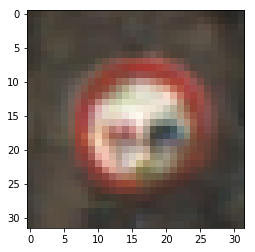

In [2]:
# show random image
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline

index = randint(0, len(X_train))
image = X_train[index,:,:,:]
sign = y_train[index]

print(y_train[index])
plt.imshow(image)
plt.show()

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0,:,:,:].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

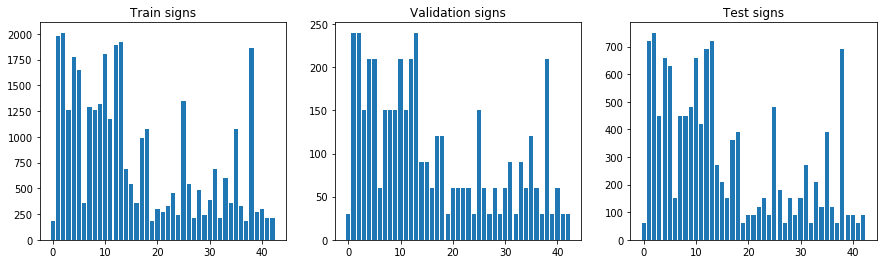

In [5]:
# barplot of the count of signs in the tree sets
from collections import Counter

train_signs_counts = Counter(y_train)
valid_signs_counts = Counter(y_valid)
test_signs_counts = Counter(y_test)

plt.figure(figsize=(15,4))
plt.subplot(131)
plt.bar(list(train_signs_counts.keys()), list(train_signs_counts.values()))
plt.title("Train signs")
plt.subplot(132)
plt.bar(list(valid_signs_counts.keys()), list(valid_signs_counts.values()))
plt.title("Validation signs")
plt.subplot(133)
plt.bar(list(test_signs_counts.keys()), list(test_signs_counts.values()))
plt.title("Test signs")
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# convert rgb images to grayscale
import numpy as np
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

X_train_gray = rgb2gray(X_train)
X_valid_gray = rgb2gray(X_valid)
X_test_gray = rgb2gray(X_test)

# Normalize data
X_train_preprocessed = (X_train_gray - 128)/128
X_valid_preprocessed = (X_valid_gray - 128)/128
X_test_preprocessed = (X_test_gray - 128)/128

X_train_preprocessed = np.expand_dims(X_train_preprocessed, axis=3)
X_valid_preprocessed = np.expand_dims(X_valid_preprocessed, axis=3)
X_test_preprocessed = np.expand_dims(X_test_preprocessed, axis=3)

### Model Architecture

In [7]:
### Define your architecture here.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

tf.reset_default_graph()

def LeNet(x):
    mu = 0
    sigma = 0.1
    weights = {
        'wc1' : tf.Variable(tf.truncated_normal([5, 5, 1, 6], mu, sigma)),
        'wc2' : tf.Variable(tf.truncated_normal([5, 5, 6, 16], mu, sigma)),
        'fc1' : tf.Variable(tf.truncated_normal([400, 120], mu, sigma)),
        'fc2' : tf.Variable(tf.truncated_normal([120, 80], mu, sigma)),
        'out' : tf.Variable(tf.truncated_normal([80, 43], mu, sigma))
    }
    biases = {
        'bc1' : tf.Variable(tf.truncated_normal([6], mu, sigma)),
        'bc2' : tf.Variable(tf.truncated_normal([16], mu, sigma)),
        'bfc1' : tf.Variable(tf.truncated_normal([120], mu, sigma)),
        'bfc2' : tf.Variable(tf.truncated_normal([80], mu, sigma)),
        'out' : tf.Variable(tf.truncated_normal([43], mu, sigma))
    }
    # Layer 1: convolutional layer
    conv1 = tf.nn.conv2d(x, weights['wc1'], strides=[1, 1, 1, 1], padding='VALID')
    conv1 = tf.nn.bias_add(conv1, biases['bc1'])
    conv1 = tf.nn.relu(conv1)
    
    # Layer 2: avg pooling
    pool1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    # Layer 3: convolutional layer
    conv2 = tf.nn.conv2d(pool1, weights['wc2'], strides=[1, 1, 1, 1], padding='VALID')
    conv2 = tf.nn.bias_add(conv2, biases['bc2'])
    conv2 = tf.nn.relu(conv2)
    
    # Layer 4: avg pooling
    pool2 = tf.nn.avg_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    # Layer 5: flatten
    flat = flatten(pool2)
    
    # Layer 6: Fully connected
    fc1 = tf.add(tf.matmul(flat, weights['fc1']), biases['bfc1'])
    fc1 = tf.nn.relu(fc1)
    
    # Layer 7: Fully connected
    fc2 = tf.add(tf.matmul(fc1, weights['fc2']), biases['bfc2'])
    fc2 = tf.nn.relu(fc2)
    
    # Layer 8: Fully connected
    out = tf.add(tf.matmul(fc2, weights['out']), biases['out'])
        
    return out

In [8]:
# define placeholders 
x = tf.placeholder(tf.float32, [None, 32, 32, 1])
y = tf.placeholder(tf.int32, [None])
y_one_hot = tf.one_hot(y, 43)

In [9]:
# training pipeline
EPOCHS = 30
BATCH_SIZE = 128
learning_rate = 0.0001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, y_one_hot)
loss = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate)
train_step = optimizer.minimize(loss)

# model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

In [10]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset + BATCH_SIZE], y_data[offset:offset + BATCH_SIZE]
        batch_accuracy = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += batch_accuracy*len(batch_x)
    return total_accuracy/num_examples

In [11]:
train_writer = tf.summary.FileWriter('./summaries/lenet/plot_train')
valid_writer = tf.summary.FileWriter('./summaries/lenet/plot_valid')

tf.summary.scalar('accuracy', accuracy)
tf.summary.scalar('loss', loss)
write_op = tf.summary.merge_all()

In [ ]:
# train the model
from sklearn.utils import shuffle
import random

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_preprocessed, y_train = shuffle(X_train_preprocessed, y_train)
        
        for counter, offset in enumerate(range(0, num_examples, BATCH_SIZE)):
            batch_x, batch_y = X_train_preprocessed[offset: offset + BATCH_SIZE], y_train[offset: offset + BATCH_SIZE]
            merge = tf.summary.merge_all()
            batch_loss, batch_acc, _ = sess.run([loss, accuracy, train_step], 
                                                 feed_dict={x: batch_x, y: batch_y})
            if counter % 100 == 0:
                print("EPOCH : {:>3}, STEP : {:>5}, Train Accuracy: {:.3f} Train Loss: {:.3f}".
                      format(i+1, counter,batch_acc, batch_loss))
                
        # log training and validation accuracy
        train_index = random.sample(range(num_examples), 5000)
        summary = sess.run(write_op, feed_dict={x: X_train_preprocessed[train_index], y: y_train[train_index]})
        train_writer.add_summary(summary, i)
        train_writer.flush()
        
        summary = sess.run(write_op, feed_dict={x: X_valid_preprocessed, y: y_valid})
        valid_writer.add_summary(summary, i)
        valid_writer.flush()
        
        validation_accuracy = evaluate(X_valid_preprocessed, y_valid)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))

Training...

EPOCH :   1, STEP :     0, Train Accuracy: 0.016 Train Loss: 3.789
EPOCH :   1, STEP :   100, Train Accuracy: 0.047 Train Loss: 3.603
EPOCH :   1, STEP :   200, Train Accuracy: 0.117 Train Loss: 3.330
Validation Accuracy = 0.121
EPOCH :   2, STEP :     0, Train Accuracy: 0.141 Train Loss: 3.169
EPOCH :   2, STEP :   100, Train Accuracy: 0.188 Train Loss: 3.138
EPOCH :   2, STEP :   200, Train Accuracy: 0.273 Train Loss: 2.841
Validation Accuracy = 0.251
EPOCH :   3, STEP :     0, Train Accuracy: 0.258 Train Loss: 2.773
EPOCH :   3, STEP :   100, Train Accuracy: 0.328 Train Loss: 2.480
EPOCH :   3, STEP :   200, Train Accuracy: 0.344 Train Loss: 2.498
Validation Accuracy = 0.371
EPOCH :   4, STEP :     0, Train Accuracy: 0.414 Train Loss: 1.961
EPOCH :   4, STEP :   100, Train Accuracy: 0.539 Train Loss: 1.780
EPOCH :   4, STEP :   200, Train Accuracy: 0.531 Train Loss: 1.655
Validation Accuracy = 0.466
EPOCH :   5, STEP :     0, Train Accuracy: 0.531 Train Loss: 1.573
EPOC